# Задание 1
В таблице * есть результаты замеров ширины и длины листовой пластины одного из видов орхидей. По результатам 20 замеров постройте уравнение линейной регрессионной зависимости длины листовой пластины от ширины.

Проверить значимость уравнения регрессии и отдельных коэффициентов.

In [25]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import openpyxl
import math

In [11]:
wb = openpyxl.load_workbook(filename = '/content/drive/MyDrive/8_02.xlsx')
sheets = wb.sheetnames
sheet = wb[sheets[0]]

In [12]:
x = [i[0].value for i in sheet['A1':'A20']]
y = [i[0].value for i in sheet['B1':'B20']]

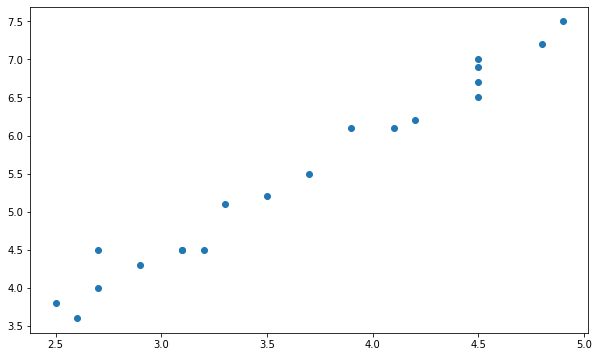

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.show()

# 1 

Вычислим оценки средних квадратических отклонений и выборочное среднее

In [15]:
Mx = np.mean(x)
My = np.mean(y)
sx = np.std(x)
sy = np.std(y)
print(f"M(x) = {round(Mx, 3)}, M(y) = {round(My, 3)}, s(x) = {round(sx,3)}, s(y) = {round(sy,3)}")

M(x) = 3.66, M(y) = 5.485, s(x) = 0.777, s(y) = 1.208


# 2
Считаем выборочный коэффициент корреляции

In [18]:
r = st.pearsonr(x,y)[0]
print(f"Выборочный коэффициент корреляции = {r}")

Выборочный коэффициент корреляции = 0.9880305557372465


#3
Вычисляем коэффициенты регрессии

In [23]:
a = r*sy/sx
b = My - r*sy*Mx/sx
print(f"Коэффициенты: {a}, {b}")
print(f"Уравнение линейной регрессии примает следующий вид: y = {round(a,3)}x + {round(b,3)}")

Коэффициенты: 1.5352415618795496, -0.13398411647915154
Уравнение линейной регрессии примает следующий вид: y = 1.535x + -0.134


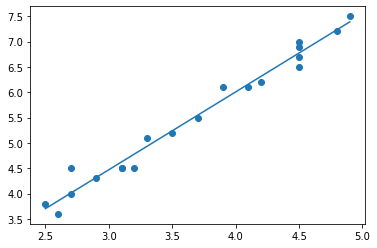

In [24]:
plt.scatter(x,y)
[x1,y1] = [[min(x), max(x)], [a*min(x)+b, a*max(x)+b]]
plt.plot(x1,y1)
plt.show()

#4
Найдем ошибку регрессии, стандартные отклонения а

In [33]:
sum = 0
for i in range(20):
  sum += (y[i] - x[i]*a - b)**2
regression_error = math.sqrt(sum/18) # ошибка регрессии
deviation_a = regression_error/(sx*math.sqrt(20)) # считаем стандартное отклонение а
quad_mean = 0
for i in range(20):
  quad_mean += x[i]**2 
quad_mean = quad_mean / 20
deviation_b = (quad_mean * regression_error) / (sx*math.sqrt(20)) #считаем стандартное отклонение b
print(f"Стандартное отклонение а = {deviation_a}, стандартное отклонение b = {deviation_b}")
T_stat_a = a/deviation_a
T_stat_b = b/deviation_b
print(f"Т-статистика а = {T_stat_a}, Т-статистика b = {T_stat_b}")

Стандартное отклонение а = 0.05649611857201984, стандартное отклонение b = 0.7909456600082777
Т-статистика а = 27.174283839029794, Т-статистика b = -0.16939737235267124


#4
Проверим значимость отдельных коэффициентов

In [37]:
T_crit = 2.101 #посчитал в экселе с помощью СТЬЮДЕНТ.ОБР.2Х(0,05;18)

if T_stat_a < T_crit:
  print(f"Коэффициент a = {round(T_stat_a,3)} незначим")
elif T_stat_b < T_crit:
  print(f"Коэффициент b = {round(T_stat_b,3)} незначим")
else:
  print("Оба коэффициента значимы")


Коэффициент b = -0.169 незначим
